<h2 align="center"> Agenda </h2><br>

### Table of Contents

* [1) Import Libraries & Data ](#chapter1)
* [2) Data Analyses](#chapter2)
    * [2.1) Overview](#section_2_1)
* [3) Questions](#chapter3)  
    * [3.1) Question 1](#section_3_1)
    * [3.2) Question 2](#section_3_2)
    * [3.3) Question 3](#section_3_3)
    * [3.4) Question 4 & 5](#section_3_4)
    * [3.5) Question 6](#section_3_5)
        * [3.5.1) Binary Relationship](#section_3_5_1)
        * [3.5.2) Linear Reationship](#section_3_5_2)
* [4) Problematic Data](#chapter4)

#### 1) Import Libraries & Data<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats
import matplotlib.cm as cm
import sys
import warnings
from datetime import datetime
from wordcloud import WordCloud
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from scipy.stats import fisher_exact

In [2]:
### display-related options
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_seq_items', 2000)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
### ignore warning
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
### import data
data_master = pd.read_csv('traffic.csv', sep=',', parse_dates=['date'])

In [5]:
data_master.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


#### 2) Data Analyses <a class="anchor" id="chapter2"></a>

I will firstly start with analyses of data in order to understand the basics of the business widely.

In [6]:
print('Number of Examples = {}'.format(data_master.shape[0]))
print('Data Shape = {}'.format(data_master.shape))
print(data_master.columns)

Number of Examples = 226278
Data Shape = (226278, 9)
Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')


Data set has 226278 rows  <br> Data set  has 9 features 

##### 2.1) Overview <a class="anchor" id="section_2_1"></a>

In [7]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


**Event:** shows how clickfire link was visited. <br>  It consists of three unique classes. <br>  These are: <ul> <li> **'click' </li>   <li>'preview'</li> <li>'pageview'** </li> </ul>



**date:** shows date to reach linkfire links. It is self-explanatory

**country, city, artist, album, track :**  are self-explanatory.

There exist errors related to **Artist, Album, Track**. I will explain later on. 

**isrc:** is used to represent unique pair of  Artist, Album, Track

**linkid:** is id of links that is used in specific event

In [8]:
data_master.head(2)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


#### 3) Questions <a class="anchor" id="chapter3"></a>

##### 3.1) Question 1 <a class="anchor" id="section_3_1"></a>

In [9]:
data_master[data_master['event'] == 'pageview'].head()

,event,date,country,city,artist,album,track,isrc,linkid
84043,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84044,pageview,2021-08-19,United States,Absecon,KA$HDAMI,epiphany,Reparations!,QZFYY2115255,9c61dba1-9369-4ee4-a215-1d34581cd811
84045,pageview,2021-08-19,Saudi Arabia,Riyadh,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
84046,pageview,2021-08-19,Ireland,Mullingar,Cardi B,Up,Up,USAT22100061,9d847c0e-6824-438f-9dc1-d76fca6dc87c
84047,pageview,2021-08-19,United Kingdom,Northampton,"Kayla Nicole, Taylor Girlz, Flo Milli","Bundles 2 (feat. Flo Milli, Taylor Girlz)","Bundles 2 (feat. Flo Milli, Taylor Girlz)",QMCE32100359,fbf4b935-f961-4b13-b1d8-45ad47093559


In [10]:
print('Min Date: ', data_master.date.min(), 'Max Date: ',data_master.date.max())

Min Date:  2021-08-19 00:00:00 Max Date:  2021-08-25 00:00:00


In [11]:
print('Total number of pageview are : ', data_master[data_master['event'] == 'pageview'].shape[0])

Total number of pageview are :  142015


In [12]:
data_counts = data_master[data_master['event'] == 'pageview'].groupby('date').size().reset_index(name='counts')

<AxesSubplot:xlabel='counts', ylabel='Density'>

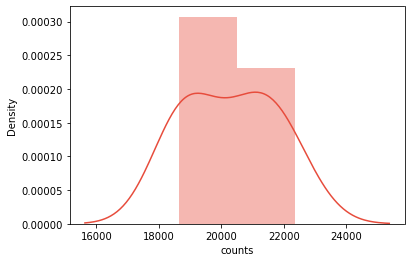

In [13]:
sns.distplot(data_counts.counts, label='Daily Visit for pageview', hist=True, color='#e74c3c')

In [14]:
data_counts_mean = data_master[data_master['event'] == 'pageview'].groupby('date').size().mean()
data_counts_median = data_master[data_master['event'] == 'pageview'].groupby('date').size().median()

In [15]:
print('An average pageview per day are : ', data_counts_mean)
print('An median of pageview per day are : ', data_counts_median)

An average pageview per day are :  20287.85714285714
An median of pageview per day are :  20430.0


In [16]:
agg_counts = data_master[data_master['event'] == 'pageview'].groupby(['linkid', 'date']).size().reset_index(name='counts')

In [17]:
agg_std = agg_counts.groupby('date').agg({'counts': ['std', 'min']})
agg_std.columns = agg_std.columns.droplevel(0)
agg_std = agg_std.reset_index().rename_axis(None, axis=1)

In [18]:
trace = go.Scatter(
    x = agg_std['date'].values,
    y = agg_std['std'].values,
    mode='markers',
    marker=dict(
        size = agg_std['std']/5,
        color = agg_std['std'],
        colorscale='Portland',
        showscale=True
    )
)
layout= go.Layout(
    autosize= True,
    title= 'Daily standard deviation of pageview',
    hovermode= 'closest',
    xaxis=dict(
        title= 'Date',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'std',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

In [19]:
fig = go.Figure(data=trace, layout=layout)

In [20]:
fig.write_html("C:/Users/erinc/ai_model/data_link_fire/data-analytics-challenge/Daily standard deviation of pageview access.html")

In [21]:
fig.write_image("C:/Users/erinc/ai_model/data_link_fire/data-analytics-challenge/Daily standard deviation of pageview access.png")

In [22]:
fig

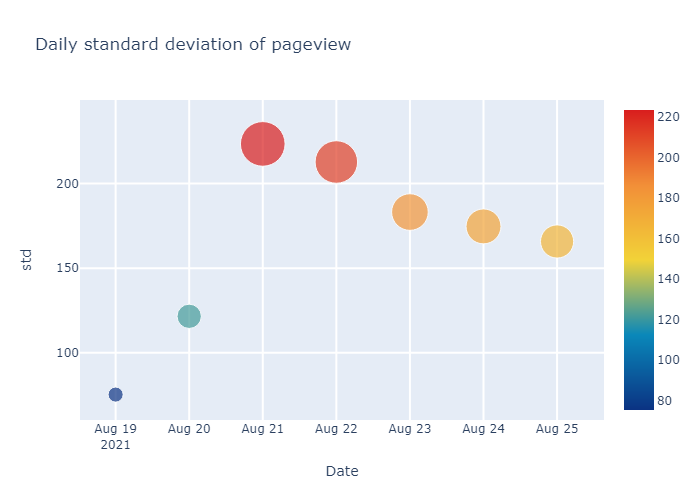

In [23]:
fig.show(renderer="png")

In [24]:
trace = go.Scatter(
    x = data_counts['date'].values,
    y = data_counts['counts'].values,
    mode='markers',
    marker=dict(
        size = data_counts['counts'].values/500,
        color = data_counts['counts'].values,
        colorscale='Portland',
        showscale=True
    )
)
layout= go.Layout(
    autosize= True,
    title= 'Daily Visit for pageview',
    hovermode= 'closest',
    xaxis=dict(
        title= 'Date',
        ticklen= 5,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Daily Visit',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

In [25]:
fig = go.Figure(data=trace, layout=layout)

In [26]:
fig

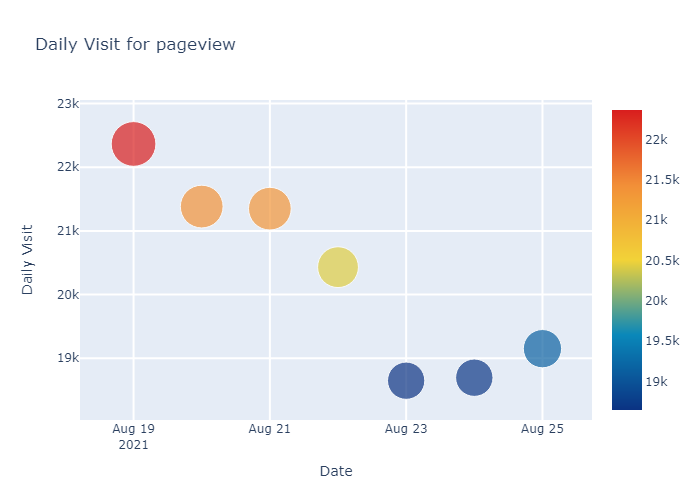

In [27]:
fig.show(renderer="png")

##### 3.2) Question 2 <a class="anchor" id="section_3_2"></a>

----------------------------------------------------------------------------------------------------
Total number of click are :  55732
An average click per day are :  7961.714285714285
An median of click per day are :  7854.0
----------------------------------------------------------------------------------------------------
Total number of preview are :  28531
An average preview per day are :  4075.8571428571427
An median of preview per day are :  3847.0


Text(0.5, 1.05, 'Distribution of Preview Feature')

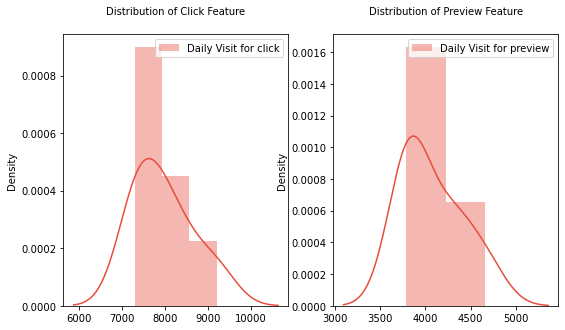

In [28]:
cont_features = ['click', 'preview']
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(5, 5))
plt.subplots_adjust(right=1.5)
for i, feature in enumerate(cont_features): 
    print('--'*50)
    print(f'Total number of {feature} are : ', data_master[data_master['event'] == feature].shape[0])
    data_counts = data_master[data_master['event'] == feature].groupby('date').size().reset_index(name='counts')
    sns.distplot(data_counts.counts, label=f'Daily Visit for {feature}', hist=True, color='#e74c3c', ax=axs[i])
    axs[i].set_xlabel('')
    data_counts_mean = data_master[data_master['event'] == feature].groupby('date').size().mean()
    data_counts_median = data_master[data_master['event'] == feature].groupby('date').size().median()
    print(f'An average {feature} per day are : ', data_counts_mean)
    print(f'An median of {feature} per day are : ', data_counts_median)
    for j in range(1):        
        axs[j].tick_params(axis='x', labelsize=10)
        
    axs[i].legend(loc='upper right', prop={'size': 10})
    
axs[0].set_title('Distribution of {} Feature'.format('Click'), size=10, y=1.05)
axs[1].set_title('Distribution of {} Feature'.format('Preview'), size=10, y=1.05)

In [29]:
agg_1 = data_master.groupby(['event','linkid', 'date']).size().reset_index(name='counts')

In [30]:
data = []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    agg_2 = agg_1.groupby(['event','date'])['counts'].quantile(i).reset_index()
    for j in agg_2.event.unique():
        data.append(go.Scatter(
            x = agg_2[agg_2['event'] == j]['date'].values,
            y = agg_2[agg_2['event'] == j]['counts'].values,
            name = f'{j}{i} quantile'
            ))
        layout = go.Layout(dict(title = "Daily Access of Each Event by Quantiles",
             xaxis = dict(title = 'Date'),
             yaxis = dict(title = 'Daily Access'),
            ),legend=dict(orientation="h"))

In [31]:
fig = go.Figure(dict(data=data, layout=layout))

In [32]:
fig

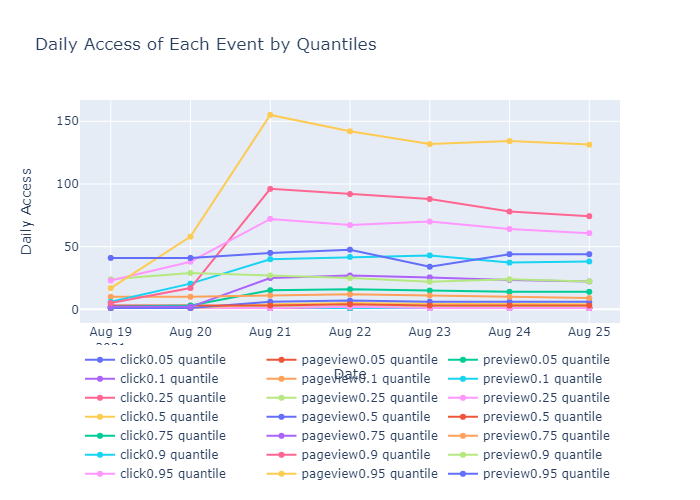

In [33]:
fig.show(renderer="png")

##### 3.3) Question 3 <a class="anchor" id="section_3_3"></a>

In [34]:
df_word = data_master.copy()

In [35]:
data_master.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [36]:
df_word['country'].fillna('unknown', inplace=True)

In [37]:
df_word['country'] = df_word[df_word['event'] == 'pageview']['country'].apply(lambda x: x.replace(' ', ''))

In [38]:
df_counts = pd.DataFrame(df_word['country'].value_counts()).reset_index()
df_counts.columns = ['unique_values', 'counts']

In [39]:
df_counts.head()

,unique_values,counts
0,SaudiArabia,28873
1,India,27286
2,UnitedStates,20839
3,France,9674
4,Iraq,4897


In [40]:
data = dict(zip(df_counts['unique_values'].tolist(), df_counts['counts'].tolist()))

In [41]:
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 1500, random_state=1, background_color='salmon', 
          colormap='Pastel1', stopwords = [], min_font_size=35).generate_from_frequencies(data)

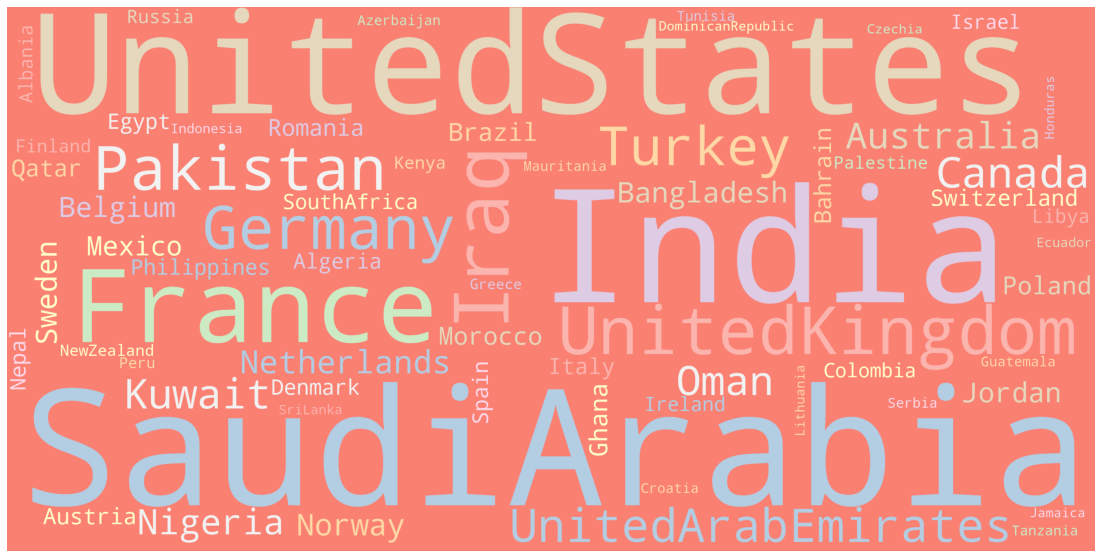

In [42]:
fig = plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off");

##### 3.4) Question 4 & 5 <a class="anchor" id="section_3_4"></a>

In [43]:
output = pd.pivot_table(data=data_master, index=['linkid'],
                        columns=['event'],
                        values='date',
                        aggfunc=['count'])
output.columns = output.columns.droplevel(0)
output = output.reset_index().rename_axis(None, axis=1)

In [44]:
output['click/pageview'] = output['click'] / output['pageview']
output['click/preview'] = output['click'] / output['preview']
output.sort_values(by = ['click/pageview'], ascending = False, inplace = True)

In [45]:
output.head()

,linkid,click,pageview,preview,click/pageview,click/preview
3029,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923.00,10.00,NaN,92.30,NaN
792,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3.00,1.00,NaN,3.00,NaN
614,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3.00,1.00,NaN,3.00,NaN
2953,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,2.00,1.00,NaN,2.00,NaN
299,132c744a-d87b-5ed6-aff2-d9b8c718a4ea,2.00,1.00,NaN,2.00,NaN


In [46]:
data_master[data_master['linkid'] == 'c95f1fc1-fab0-4c74-b3f5-52bd3684a713'].event.value_counts(dropna =False)

click       923
pageview     10
Name: event, dtype: int64

In [47]:
data_master.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [48]:
output.shape

(3839, 6)

In [49]:
print(output['click/pageview'].mean())
print(output['click/pageview'].median())
print(output['click/preview'].mean())
print(output['click/preview'].median())


0.8099204886008637
1.0
2.619006587478279
2.0


In [50]:
output[['click/pageview', 'click/preview']] = output[['click/pageview', 'click/preview']].fillna(value=0)

In [51]:
print(output['click/pageview'].mean())
print(output['click/pageview'].median())
print(output['click/preview'].mean())
print(output['click/preview'].median())


0.4753193177436171
0.38751069289991447
0.31654572977075324
0.0


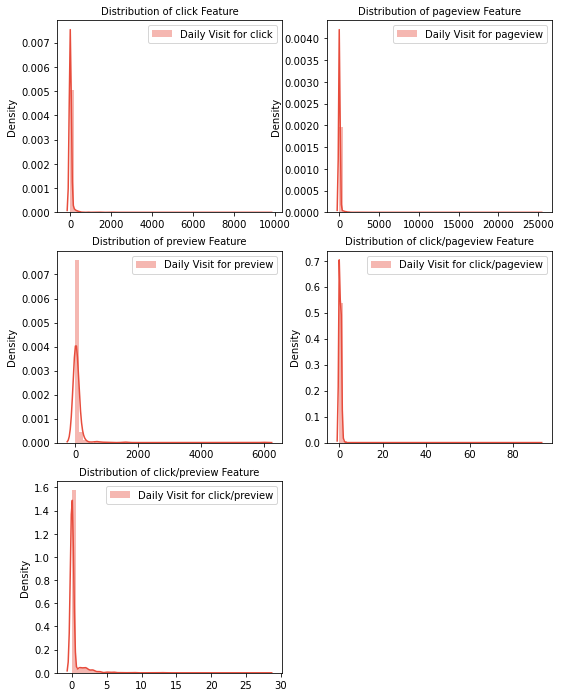

In [52]:
cont_features = ['click', 'pageview', 'preview', 'click/pageview', 'click/preview']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(5, 12))
plt.subplots_adjust(right=1.5)
fig.delaxes(axs[2,1]) 
axs = axs.ravel()
j = 0
for i, feature in enumerate(cont_features): 
    sns.distplot(output[feature], label=f'Daily Visit for {feature}', hist=True, color='#e74c3c', ax=axs[i])
    axs[i].set_xlabel('')

    for j in range(1):        
        axs[i].tick_params(axis='x', labelsize=10)
        
    axs[i].legend(loc='upper right', prop={'size': 10})
    axs[i].set_title('Distribution of {} Feature'.format(feature), size=10)
fig.savefig("C:/Users/erinc/ai_model/data_link_fire/data-analytics-challenge/Distribution of  Features.jpg")

In [53]:
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


In [54]:
output = pd.pivot_table(data=data_master, index=['linkid', 'date'],
                        columns=['event'],
                        values='city',
                        aggfunc=['count'])
output.columns = output.columns.droplevel(0)
output = output.reset_index().rename_axis(None, axis=1)
output['click/pageview'] = output['click'] / output['pageview']
output['click/preview'] = output['click'] / output['preview']
output.sort_values(by = ['click/pageview'], ascending = False, inplace = True)
output[['click/pageview', 'click/preview']] = output[['click/pageview', 'click/preview']].fillna(value=0)

In [55]:
output.head()

,linkid,date,click,pageview,preview,click/pageview,click/preview
5170,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,2021-08-19,177.00,1.00,NaN,177.00,0.00
5171,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,2021-08-20,110.00,1.00,NaN,110.00,0.00
5175,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,2021-08-24,133.00,3.00,NaN,44.33,0.00
5176,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,2021-08-25,131.00,5.00,NaN,26.20,0.00
6546,ffd3c9e7-c5c5-4f28-b03d-cbaec33f2152,2021-08-24,6.00,1.00,NaN,6.00,0.00


In [56]:
agg_2 = output.groupby('date').agg({'click/pageview': ['mean', 'std'], 
                                       'click/preview': ['mean', 'std']})
agg_2.columns = agg_2.columns.droplevel(0)
agg_2 = agg_2.reset_index().rename_axis(None, axis=1)
agg_2.columns = ['date', 'click/pageview_mean', 'click/pageview_std', 'click/preview_mean', 'click/preview_std']

In [57]:
agg_2

,date,click/pageview_mean,click/pageview_std,click/preview_mean,click/preview_std
0,2021-08-19,0.51,3.34,0.21,0.96
1,2021-08-20,0.52,2.93,0.42,1.22
2,2021-08-21,0.42,0.35,1.23,1.65
3,2021-08-22,0.40,0.33,1.18,1.65
4,2021-08-23,0.41,0.32,1.29,1.72
5,2021-08-24,0.49,2.07,1.25,2.12
6,2021-08-25,0.47,1.24,1.29,1.89


In [58]:
trace = go.Scatter(
    x = agg_2['date'].values,
    y = agg_2['click/pageview_mean'].values,
    mode='markers',
    marker=dict(
        size = agg_2['click/pageview_mean']*50,
        color = agg_2['click/pageview_mean'],
        colorscale='Portland',
        showscale=True
    ))
layout = go.Layout(dict(title = "Daily Mean of click/pageview",
     xaxis = dict(title = 'Date'),
     yaxis = dict(title = 'Mean click/pageview'),
    ),legend=dict(orientation="h"))

In [59]:
fig = go.Figure(data=trace, layout=layout)

In [60]:
fig

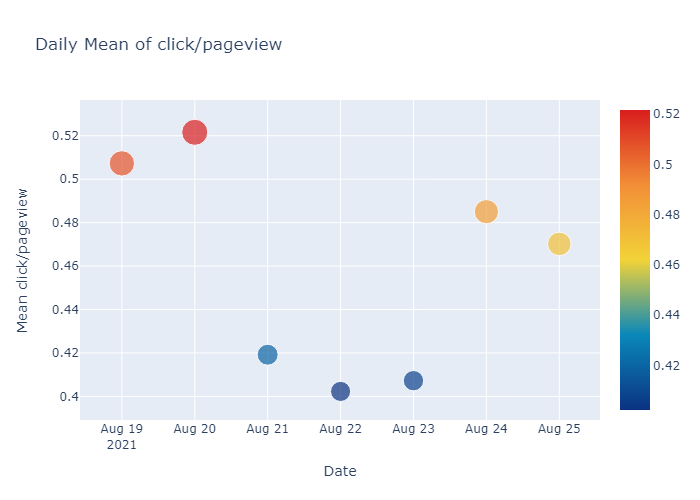

In [61]:
fig.show(renderer="png")

In [62]:
trace = go.Scatter(
    x = agg_2['date'].values,
    y = agg_2['click/preview_mean'].values,
    mode='markers',
    marker=dict(
        size = agg_2['click/preview_mean']*50,
        color = agg_2['click/preview_mean'],
        colorscale='Portland',
        showscale=True
    ))
layout = go.Layout(dict(title = "Daily Mean of click/preview",
     xaxis = dict(title = 'Date'),
     yaxis = dict(title = 'Mean click/preview'),
    ),legend=dict(orientation="h"))

In [63]:
fig = go.Figure(data=trace, layout=layout)

In [64]:
fig

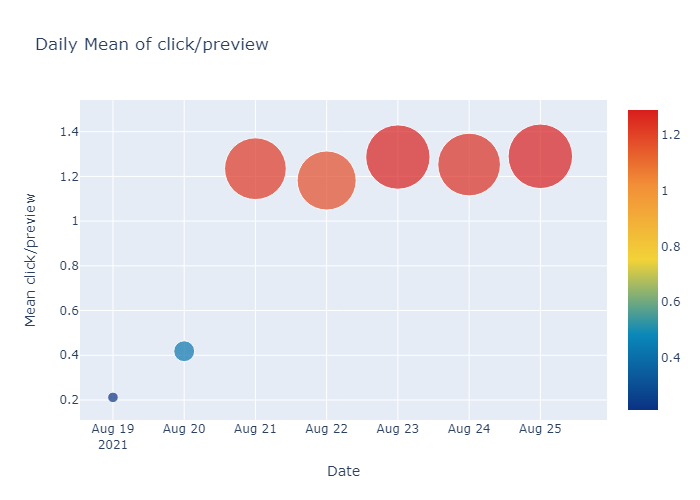

In [65]:
fig.show(renderer="png")

##### 3.5) Question 6 <a class="anchor" id="section_3_5"></a>

###### 3.5.1) Binary Relationship <a class="anchor" id="section_3_5_1"></a>

In [66]:
data_master = data_master.assign(**pd.get_dummies(data_master['event']))

In [67]:
data_master.head(3)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,1,0,0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,1,0,0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1,0,0


In [68]:
data_master.corr()

,click,pageview,preview
click,1.00,-0.74,-0.22
pageview,-0.74,1.00,-0.49
preview,-0.22,-0.49,1.00


In [69]:
confusion_matrix = pd.crosstab(data_master['click'], data_master['preview'])

In [70]:
confusion_matrix

preview,0,1
click,,
0,142015,28531
1,55732,0


In [71]:
oddsratio, pvalue = fisher_exact(confusion_matrix)

In [72]:
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


In [73]:
data_master.head(3)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,1,0,0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,1,0,0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1,0,0


In [74]:
data_master[data_master['linkid'] == '2d896d31-97b6-4869-967b-1c5fb9cd4bb8'].preview.unique()

array([0, 1], dtype=uint8)

In [75]:
link_values = data_master.groupby(['linkid']).agg({'click':'max', 'pageview':'max', 'preview':'max'}).reset_index()

In [76]:
link_values.head()

,linkid,click,pageview,preview
0,00073307-ae96-5089-a117-4783afb42f8e,0,1,0
1,00126b32-0c35-507b-981c-02c80d2aa8e7,1,1,0
2,0018cfff-50a1-5984-9715-01ef2d11a49a,0,1,0
3,0033934b-5d16-5a06-af58-d087bcdd3680,0,1,0
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0,1,0


In [77]:
confusion_matrix = pd.crosstab(link_values['click'], link_values['preview'])

In [78]:
confusion_matrix

preview,0,1
click,,
0,1553,31
1,1791,464


In [79]:
oddsratio, pvalue = fisher_exact(confusion_matrix)

In [80]:
print('Fisher exact test p-value: {:.4f}'.format(pvalue))

Fisher exact test p-value: 0.0000


In [81]:
### There exist a strong correlation between them

###### 3.5.2) Linear Reationship <a class="anchor" id="section_3_5_2"></a>

In [82]:
event_values = data_master.groupby(['linkid'])['event'].value_counts().reset_index(name='counts')

In [83]:
event_values.head()

,linkid,event,counts
0,00073307-ae96-5089-a117-4783afb42f8e,pageview,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,click,2
2,00126b32-0c35-507b-981c-02c80d2aa8e7,pageview,2
3,0018cfff-50a1-5984-9715-01ef2d11a49a,pageview,1
4,0033934b-5d16-5a06-af58-d087bcdd3680,pageview,1


In [84]:
df_event = event_values.pivot_table(index=['linkid'], columns=['event'], values=['counts'])

In [85]:
df_event.columns = df_event.columns.droplevel(0)
df_event = df_event.reset_index().rename_axis(None, axis=1)

In [86]:
df_event.fillna(0 , inplace=True)

In [87]:
df_event.head()

,linkid,click,pageview,preview
0,00073307-ae96-5089-a117-4783afb42f8e,0.00,2.00,0.00
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2.00,2.00,0.00
2,0018cfff-50a1-5984-9715-01ef2d11a49a,0.00,1.00,0.00
3,0033934b-5d16-5a06-af58-d087bcdd3680,0.00,1.00,0.00
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0.00,1.00,0.00


In [88]:
df_event.corr()

,click,pageview,preview
click,1.00,0.99,0.99
pageview,0.99,1.00,1.00
preview,0.99,1.00,1.00


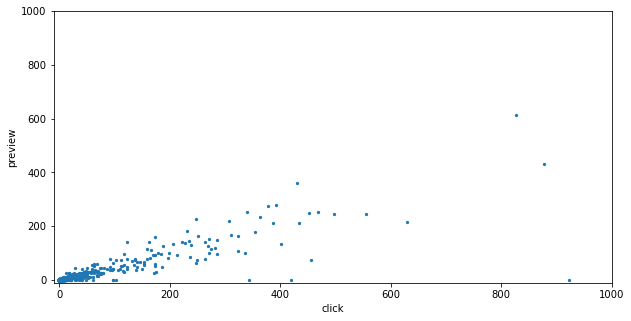

In [89]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(df_event.click, df_event.preview, s=5)
plt.xlim(-10, 1000)
plt.ylim(-10, 1000)
plt.xlabel('click')
plt.ylabel('preview')
plt.show()

In [90]:
covariance = np.cov(df_event.click, df_event.preview)

In [91]:
covariance

array([[31732.91104692, 19354.25906195],
       [19354.25906195, 12076.76079663]])

In [92]:
### Covariance coefficient of 19354 shows a very strong relationship between them

In [93]:
stats.pearsonr(df_event.click, df_event.preview)

(0.9886586274883709, 0.0)

In [94]:
corr, _ = stats.spearmanr(df_event.click, df_event.preview)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.520


<AxesSubplot:xlabel='click', ylabel='preview'>

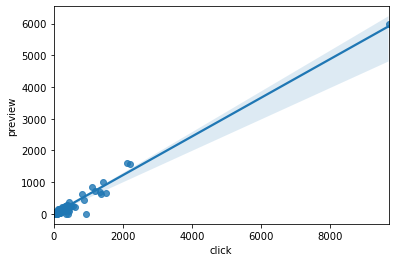

In [95]:
sns.regplot(x='click', y='preview', fit_reg=True, data=df_event)

In [96]:
pp_x = sm.ProbPlot(df_event.click)
pp_y = sm.ProbPlot(df_event.preview)

click increases more than preview

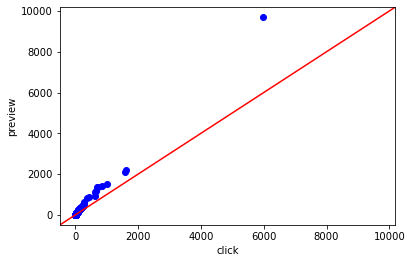

In [97]:
qqplot_2samples(pp_x, pp_y, line='45', xlabel='click', ylabel='preview')
plt.show()

##### 4) Problematic Data <a class="anchor" id="section_4"></a>

##### Part 1

In [98]:
data_master[data_master.isrc.isin(['USUG12101245'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
115,click,2021-08-23,India,Nagpur,Olivia Rodrigo,SOUR,good 4 u,USUG12101245,a4a6c5d9-eb71-4987-9e37-762aa9fc740b,1,0,0


In [99]:
### There is no album named ‘good 4 u’ for this artist. It is actually the name of the song
data_master[data_master.isrc.isin(['USUG12101245'])].album.unique()

array(['SOUR', 'good 4 u'], dtype=object)

##### Part 2

In [100]:
data_master[data_master.isrc.isin(['QZES52183092'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
508,click,2021-08-20,United States,Hoboken,PinkPantheress,Break It Off,Break It Off,QZES52183092,4f3fd357-b2b0-4ddb-b047-8cef495611d6,1,0,0


In [101]:
### It is actually the same album but the album name is written with both uppercase and lowercase  letters.
data_master[data_master.isrc.isin(['QZES52183092'])].album.unique()

array(['Break It Off', 'Break it off'], dtype=object)

##### Part 3

In [102]:
data_master[data_master.isrc.isin(['USUM72019170'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
23502,click,2021-08-22,Saudi Arabia,Jeddah,"Justin Bieber, benny blanco",Lonely (with benny blanco),Lonely (with benny blanco),USUM72019170,708f28d7-e07d-40ef-b136-b5c5069b5f47,1,0,0


In [103]:
### For the same isrc number, artist name changes.
data_master[data_master.isrc.isin(['USUM72019170'])].artist.unique()

array(['Justin Bieber, benny blanco', 'Justin Bieber'], dtype=object)

##### Part 4

In [104]:
data_master[data_master.isrc.isin(['USAT22007608'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
2421,click,2021-08-19,United States,O'Fallon,YBN Nahmir,VISIONLAND,Opp Stoppa,USAT22007608,49244e0c-1de9-48d6-8c82-eac77f30f91c,1,0,0


In [105]:
### Track name is used as album name 
data_master[data_master.isrc.isin(['USAT22007608'])].album.unique()

array(['VISIONLAND', 'Opp Stoppa'], dtype=object)

##### Part 5

In [106]:
data_master[data_master.isrc.isin(['USAT21906986'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
1972,click,2021-08-22,Ghana,Accra,"Roddy Ricch, Ty Dolla $ign",Please Excuse Me For Being Antisocial,Bacc Seat feat Ty Dolla ign,USAT21906986,eb04346b-79ce-4c9e-bc77-554f574a6636,1,0,0


In [107]:
### Artist name changes in the records. 
data_master[data_master.isrc.isin(['USAT21906986'])].artist.unique()

array(['Roddy Ricch, Ty Dolla $ign', 'Roddy Ricch'], dtype=object)

##### Part 6

In [108]:
### There is empty isrc numbers 
data_master[data_master['artist'] == '42 Dugg'].isrc.unique()

array([nan], dtype=object)

##### Part 7

In [109]:
data_master[data_master.isrc.isin(['QZ93L2115464'])].head(1)

,event,date,country,city,artist,album,track,isrc,linkid,click,pageview,preview
9869,click,2021-08-21,Bangladesh,Unknown,SEB,seaside_demo,seaside_demo,QZ93L2115464,c7d6ddaa-43ed-4afd-a34f-82ec42ec5ad0,1,0,0


In [110]:
### There is uppercase and lowercase  letters for album name
data_master[data_master.isrc.isin(['QZ93L2115464'])].album.unique()

array(['seaside_demo', 'Seaside_demo'], dtype=object)